# Morfología Matemática con Scikit-Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib ipympl

from PIL import Image

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin)

from skimage import data
from skimage.util import invert

## Elementos estructurantes

### 2D

In [2]:
struc_2d = {
    "square(15)": square(15),
    "rectangle(15, 10)": rectangle(15, 10),
    "diamond(7)": diamond(7),
    "disk(7)": disk(7),
    "octagon(7, 4)": octagon(7, 4),
    "star(5)": star(5)
}

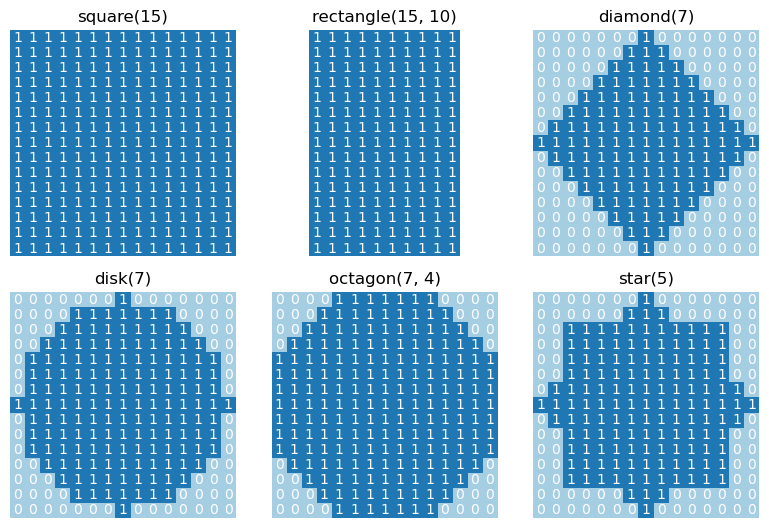

In [3]:
fig = plt.figure(figsize=(8, 8))

idx = 1
for title, struc in struc_2d.items():
    ax = fig.add_subplot(3, 3, idx)
    ax.imshow(struc, cmap="Paired", vmin=0, vmax=12)
    for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
            ax.text(j, i, struc[i, j], ha="center", va="center", color="w")
    ax.set_axis_off()
    ax.set_title(title)
    idx += 1


fig.tight_layout()
plt.show()

### 3D

In [4]:
struc_3d = {
    "cube(11)": cube(11),
    "octahedron(5)": octahedron(5),
    "ball(5)": ball(5)
}

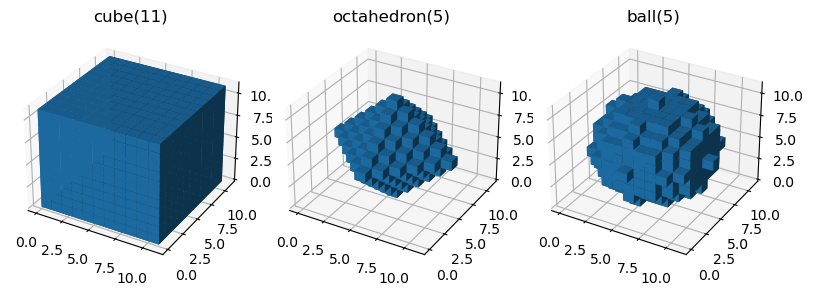

In [5]:
fig = plt.figure(figsize=(8, 8))

idx = 1

for title, struc in struc_3d.items():
    ax = fig.add_subplot(3, 3, idx, projection=Axes3D.name)
    ax.voxels(struc)
    ax.set_title(title)
    idx += 1

fig.tight_layout()
plt.show()

## Erosión

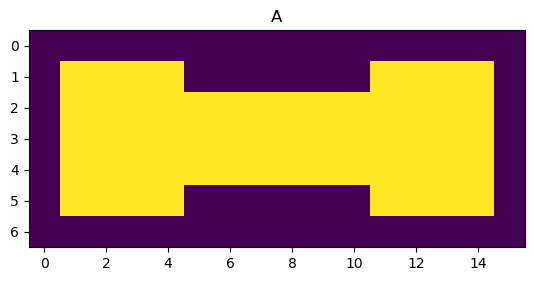

In [6]:
A = rectangle(5, 14)
A[[0,4],4:10] = 0
A = np.pad(A, 1, 'constant')
#Hay que ponerle el marco pues los
# elementos estructurantes no sobrepasan el área de imagen

plt.imshow(A)
plt.title('A');

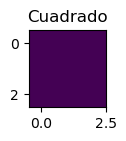

In [7]:
plt.figure(figsize=(1,1))
plt.imshow(square(3))
plt.title('Cuadrado');
# Ojo, se invierten colores en representación

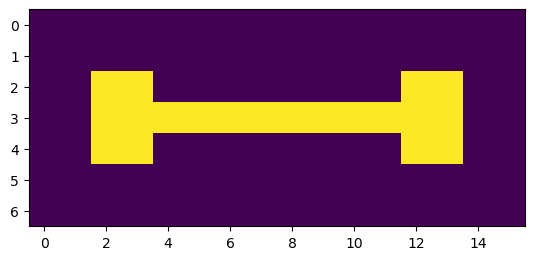

In [8]:
plt.imshow(binary_erosion(A, square(3)))
#Si no se le pone el marco, el elemento estructurante
#calcula mal los bordes

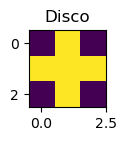

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(disk(1))
plt.title('Disco');

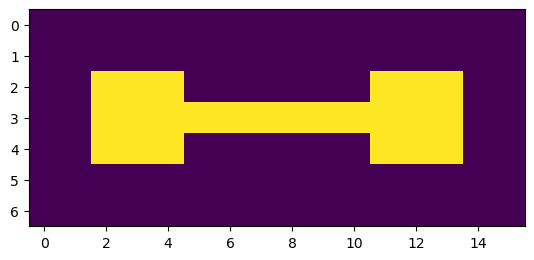

In [10]:
plt.imshow(binary_erosion(A, disk(1)))

### Erosión para eliminar componentes

formato: TIFF
(ancho, alto) = (486, 486)
modo:  1


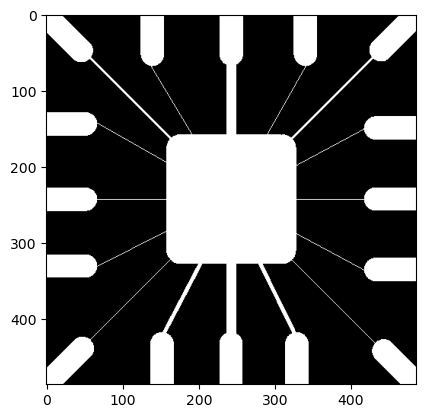

In [11]:
file = 'images/wirebond_mask.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

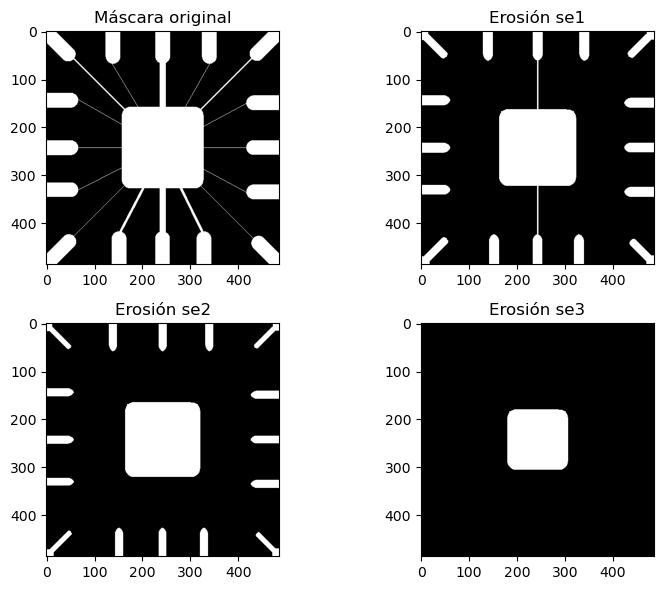

In [12]:

plt.figure(figsize=(8, 6))

plt.subplot(221)
plt.title('Máscara original')
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.title('Erosión se1')
plt.imshow(binary_erosion(np.array(img), square(11)), cmap='gray')

plt.subplot(223)
plt.title('Erosión se2')
plt.imshow(binary_erosion(np.array(img), square(15)), cmap='gray')

plt.subplot(224)
plt.title('Erosión se3')
plt.imshow(binary_erosion(np.array(img), square(45)), cmap='gray')
plt.tight_layout()

## Dilatación

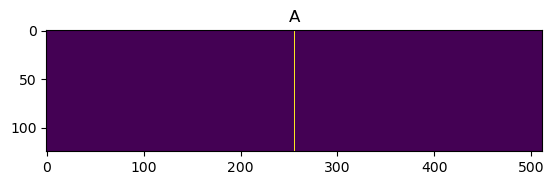

In [13]:
A = np.logical_not(rectangle(125,512))
A[:,256] = 1

plt.imshow(A)
plt.title('A');

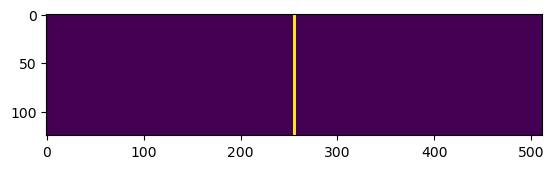

In [14]:
plt.imshow(binary_dilation(A,disk(radius=1)))

### Dilatación para reparar caracteres

formato: TIFF
(ancho, alto) = (508, 444)
modo:  1


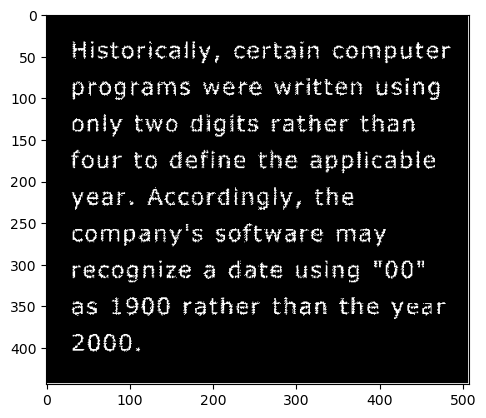

In [15]:
file = 'images/text_gaps.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

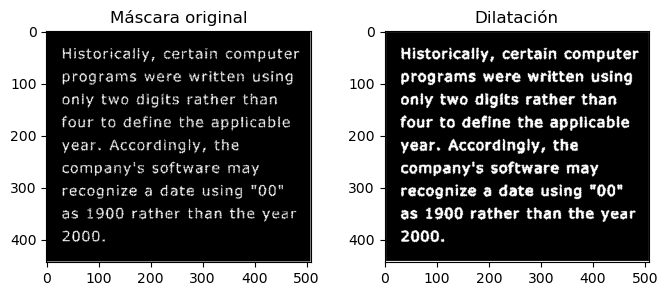

In [16]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
plt.title('Máscara original')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('Dilatación')
plt.imshow(binary_dilation(np.array(img), disk(radius=1)), cmap='gray')

## Apertura  y cierre

- Apertura: erosión + dilatación
- Cierre: dilatación + erosión

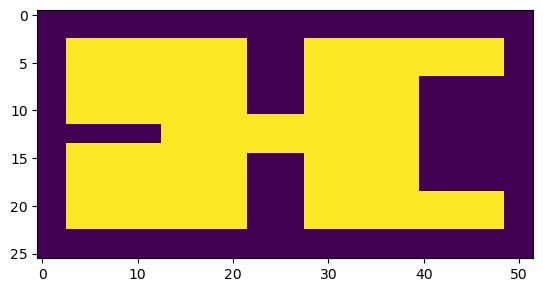

In [17]:
A = rectangle(20, 46)
A[9:11, 0:10] = 0
A[0:8, 19:25] = 0
A[12:20, 19:25] = 0
A[4:16,37:46] = 0
A = np.pad(A,3, 'constant')

plt.imshow(A)

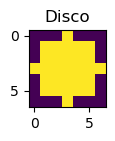

In [18]:
plt.figure(figsize=(1,1))
plt.imshow(disk(3))
plt.title('Disco');

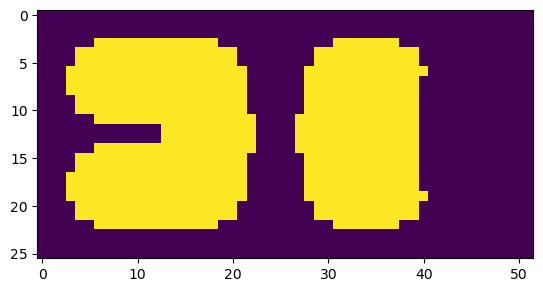

In [19]:
plt.imshow(binary_opening(A,disk(3)))

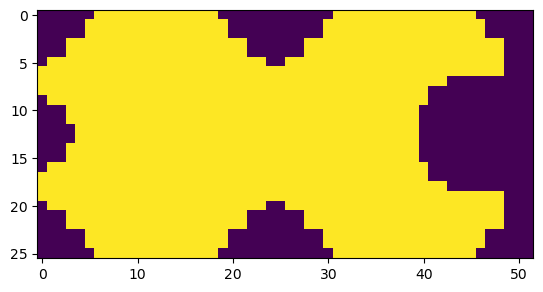

In [20]:
plt.imshow(binary_closing(A,disk(3)))

### Eliminación de trodas las componentes no centrales

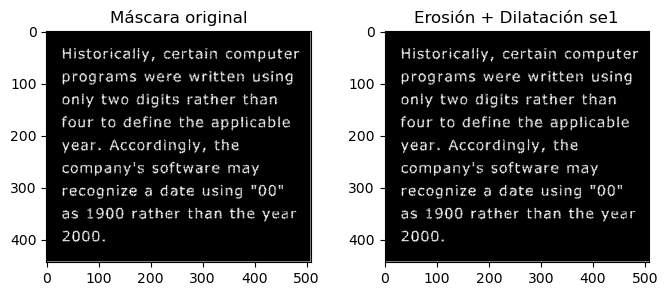

In [21]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
plt.title('Máscara original')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('Erosión + Dilatación se1')
plt.imshow(binary_dilation(binary_erosion(np.array(img), square(1)),square(1)), cmap='gray')


### Filtrado de huella dactilar

formato: TIFF
(ancho, alto) = (315, 238)
modo:  1


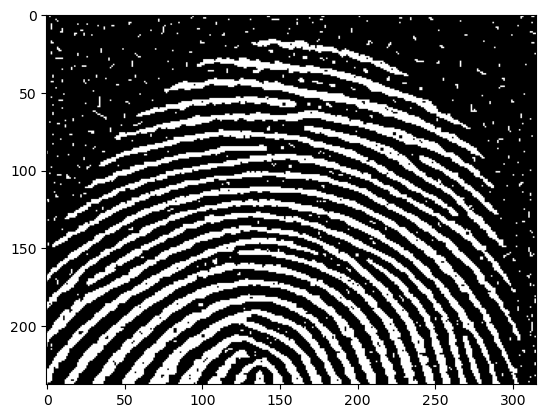

In [22]:
file = 'images/noisy_fingerprint.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

img = np.array(img)

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Erosión')

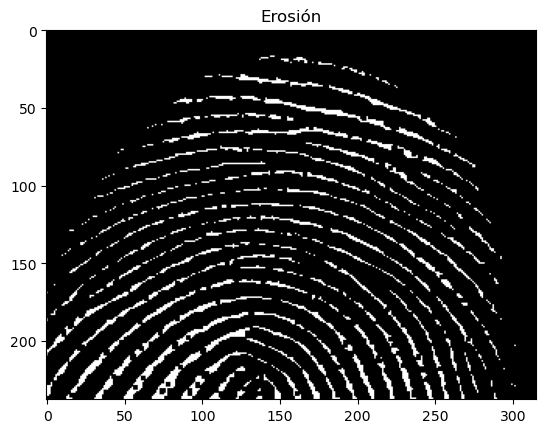

In [23]:
#Erosión
plt.imshow(binary_erosion(img, square(3)), cmap='gray')
plt.title('Erosión')

Text(0.5, 1.0, 'Apertura')

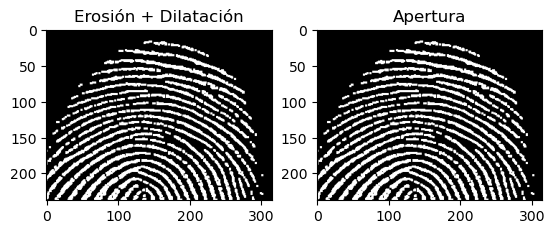

In [24]:
#Erosión + Dilatación
plt.subplot(121)
plt.imshow(binary_dilation(binary_erosion(img, square(3)),square(3)), cmap='gray')
plt.title('Erosión + Dilatación')

#Apertura
plt.subplot(122)
plt.imshow(binary_opening(img, square(3)), cmap='gray')
plt.title('Apertura')

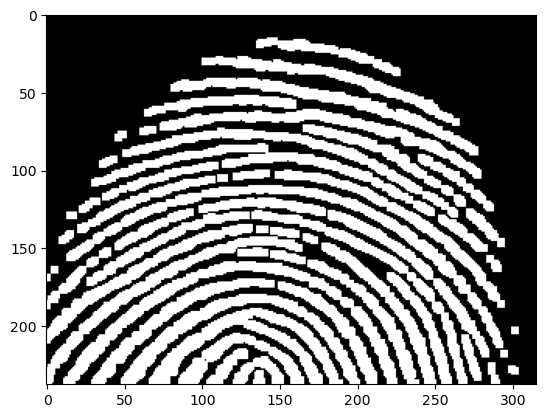

In [25]:
#Apertura + Dilatación
plt.imshow(binary_dilation(binary_opening(img, square(3)), square(3)),cmap='gray')

Text(0.5, 1.0, 'Apertura + Cierre')

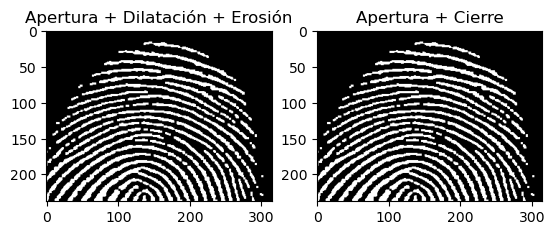

In [26]:
#Apertura + Dilatación + Erosión
plt.subplot(121)
plt.imshow(binary_erosion(binary_dilation(binary_opening(img, square(3)),square(3)),square(3)), cmap='gray')
plt.title('Apertura + Dilatación + Erosión')

#Apertura + Cierre
plt.subplot(122)
plt.imshow(binary_closing(binary_opening(img, square(3)),square(3)), cmap='gray')
plt.title('Apertura + Cierre')

### Extracción de contornos

formato: TIFF
(ancho, alto) = (221, 269)
modo:  1


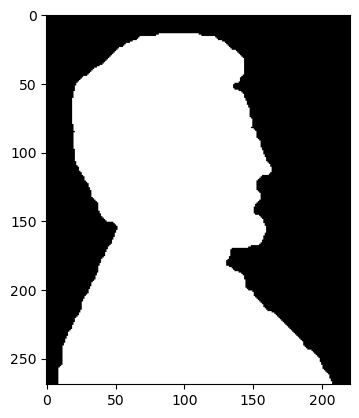

In [27]:
file = 'images/lincoln_mask.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

img = np.array(img)

plt.imshow(img, cmap='gray')

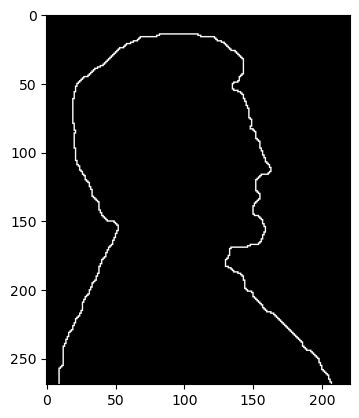

In [28]:
plt.imshow(np.logical_xor(img, binary_erosion(img,square(3))), cmap='gray')

### Rellenar agujeros

formato: TIFF
(ancho, alto) = (512, 512)
modo:  L


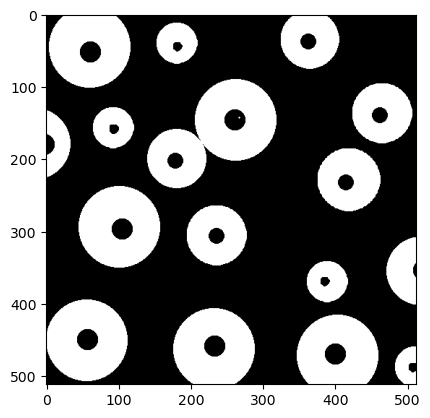

In [29]:
file = 'images/circles_holes_mask.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

img = np.array(img)

plt.imshow(img, cmap='gray')

C:\Users\Usuario\miniconda3\envs\jra\lib\site-packages\skimage\_shared\utils.py:157: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  return func(*args, **kwargs)


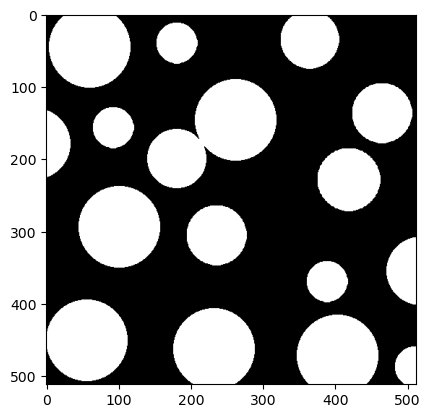

In [30]:
plt.imshow(remove_small_holes(img,1024), cmap='gray')

### Componentes conectadas

In [31]:
label(img).max()

17

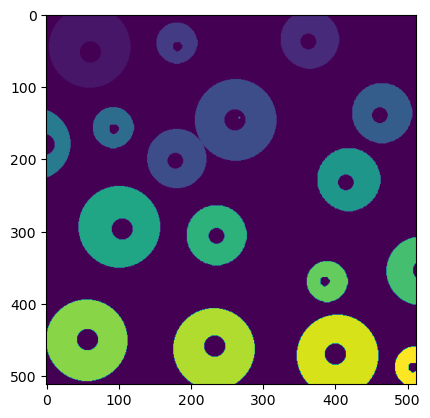

In [32]:
plt.imshow(label(img))

### Envolvnte convexa

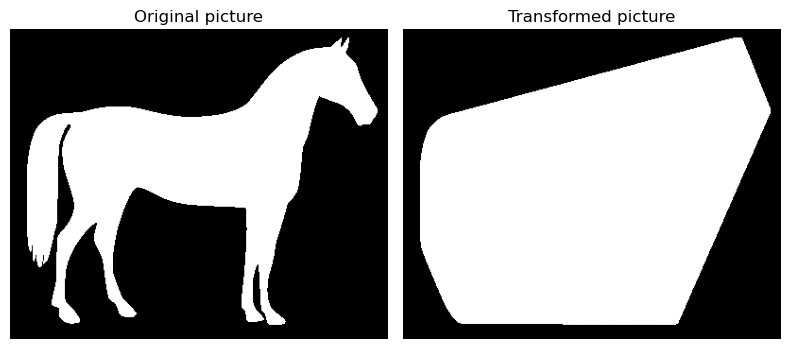

In [33]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.
image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

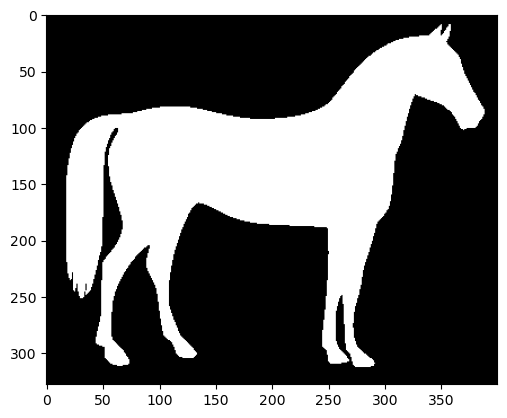

In [34]:
img = invert(data.horse())

plt.imshow(img,cmap='gray')

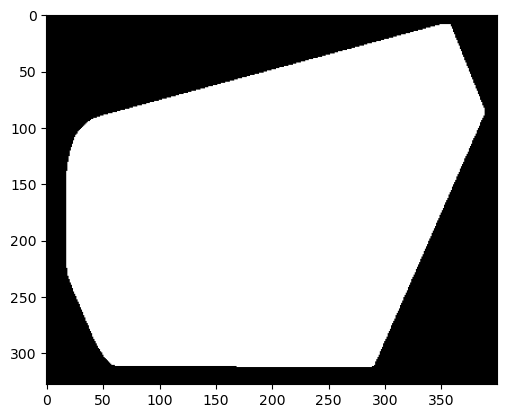

In [35]:
plt.imshow(convex_hull_image(img),cmap='gray')

### Esqueletonización

Text(0.5, 1.0, 'Esqueletonización')

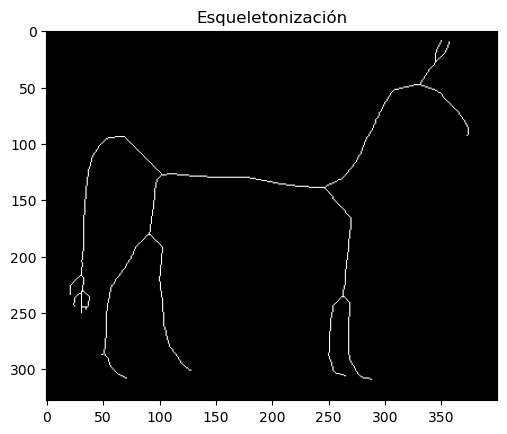

In [36]:
plt.imshow(skeletonize(img),cmap='gray')
plt.title('Esqueletonización')

### Adelgazamiento

Text(0.5, 1.0, 'Adelgazamiento')

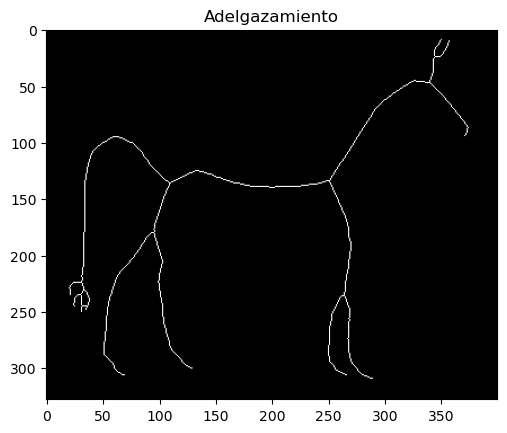

In [37]:
plt.imshow(thin(img),cmap='gray')
plt.title('Adelgazamiento')

Text(0.5, 1.0, 'Adelgazamiento parcial')

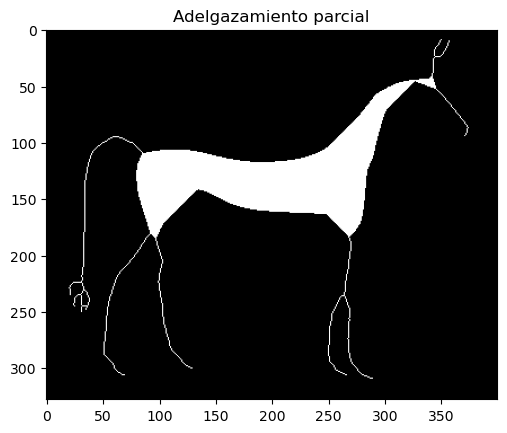

In [38]:
plt.imshow(thin(img, max_num_iter=25),cmap='gray')
plt.title('Adelgazamiento parcial')